# Using metrics to assess the performance of your neural network
----

Hello everyone! In this tutorial, we are going to learn how to use various metrics in order to assess the performance of our neural networks. I have chosen to work on three cases:
* *multi-classification*
* *imbalanced binary classification*
* *regression*

I believe these cases are diverse enough to help you in any machine learning project you will encounter further. 
If you would like me to add any extra metrics that are not encountered below, please let me know and I will do my best to add them later on. So, let's get started :)!

** TensorFlow version used - 1.5 **


## Step 1: Import useful libraries and enable eager mode
----

In [39]:
# Suppress future warnings
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import TensorFlow and TensorFlow Eager
import tensorflow as tf
import tensorflow.contrib.eager as tfe

# Import functions to generate toy classication problems
from sklearn.datasets import load_wine

# Import numpy for data preprocessing
import numpy as np

# Import library for plots
import matplotlib.pyplot as plt
%matplotlib inline

# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

In [4]:
# Enable eager mode. Once activated it cannot be reversed! Run just once.
tfe.enable_eager_execution()

## Step 2: Create dataset for multi-classification
----

In [17]:
wine_data = load_wine()

In [43]:
print('Type of data in the wine_data dictionary: ', list(wine_data.keys()))

Type of data in the wine_data dictionary:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']


In [45]:
print('Number of classes: ', len(np.unique(wine_data.target)))

Number of classes:  3


In [48]:
print('Distribution of our targets: ', np.unique(wine_data.target, return_counts=True)[1])

Distribution of our targets:  [59 71 48]


In [49]:
print('Number of features in the dataset: ', wine_data.data.shape[1])

Number of features in the dataset:  13


###  Data visualization. Use PCA to reduce the dimensionality to 2D.
We will use PCA, only for visualization purposes. We will be training our neural network using all 13 features. 

Let's have a look at how these 3 classes are represented in the 2D space.

In [52]:
X_pca = PCA(n_components=2, random_state=2018).fit_transform(wine_data.data)

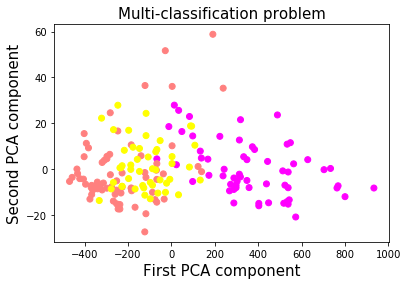

In [68]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=wine_data.target, cmap=plt.cm.spring)
plt.xlabel('First PCA component', fontsize=15)
plt.ylabel('Second PCA component', fontsize=15)
plt.title('Multi-classification problem', fontsize=15)
plt.show()

Okay, so it appears that the purple class is easier to differentiate than the rest of the classes. However, we moved from 13 dimensions to 2 dimensions so we're missing a bit on the true representation of the features.

## Let's build a two-layers neural network using the TensorFlow Eager API
----

As you might have noticed, the most convenient way to build models using TensorFlow Eager is with classes. I think that using classes for your models makes it much easier to organize and adding new components to it. You simply define the layers that you're going to use during initialization and use them later on at the predict stage. It makes it easier to read the architecture of the model during the predict stage.

In [69]:
class two_layer_nn():
    def __init__(self, num_classes=3):
        # First hidden layer.
        self.dense_1 = tf.layers.Dense(20, activation=tf.nn.relu)
        # Second hidden layer
        self.dense_2 = tf.layers.Dense(10, activation=tf.nn.relu)
        # Output layer. Unscaled log probabilities.
        self.output = tf.layers.Dense(num_classes, activation=None)
    
    def predict(self, X):
        layer_1 = self.dense_1(X)
        layer_2 = self.dense_2(layer_1)
        layer_out = self.output(layer_2)
        return layer_out

## Define loss function, optimizer and gradients function
----

In [ ]:
# Initialize model 
model = two_layer_nn(num_classes=3)

In [74]:
# Define loss function
def loss_fn(outputs, targets):
    return tf.losses.sparse_softmax_cross_entropy(targets, outputs)

In [75]:
# Define optimizer
optimizer = tf.train.GradientDescentOptimizer(5e-1)

In [76]:
# Compute the gradients of the variables with respect to the loss function
grad = tfe.implicit_gradients(loss_fn)